In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Load Label Config
with open("labelConfig.json", "r") as json_file:
    labelConfig = json.load(json_file)

IMG_SIZE = 224
NUM_CLASSES = len(labelConfig['labels'])  # Number of classes

In [3]:
# Preprocessing Function
def preprocess_images(X):
    X_resized = tf.image.resize(X, [IMG_SIZE, IMG_SIZE])
    return tf.keras.applications.mobilenet_v2.preprocess_input(X_resized)

In [4]:
# Load Dataset
image_folder = 'all-data'
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('png', 'jpg', 'jpeg'))])

In [5]:
"2-data-3-W.png".split('-')[-1].split('.')[0]

'W'

In [6]:
"1331-D.png".split('-')[-1].split('.')[0]

'D'

In [17]:
data = []
targets = []
for image_file in image_files[:10]:
    label = image_file.split('-')[-1].split('.')[0]
    if(label == 'S' or label =='A'):
        # print(label)
        readImg = cv2.cvtColor(cv2.imread(os.path.join(image_folder, image_file)), cv2.COLOR_BGR2RGB)
        data.append(preprocess_images(readImg))
        targets.append(labelConfig['labels'][label])


In [19]:
data = np.array(data)
targets = np.array(targets)


In [21]:
data.shape

(5, 224, 224, 3)

In [23]:
targets.shape

(5,)

In [25]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=42)

# Load MobileNetV2
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [26]:
X_train.shape

(3, 224, 224, 3)

In [29]:
y_train.shape

(3,)

In [31]:


unique_elements, counts = np.unique(np.array(targets), return_counts=True)

# Display the result
for element, count in zip(unique_elements, counts):
    print(f"Element: {labelConfig['labels_reversed'][str(element)]}, Count: {count}")

Element: D, Count: 5


In [33]:
# Add Custom Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [38]:
# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.0000e+00 - loss: 2.5228 - val_accuracy: 1.0000 - val_loss: 0.4114
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 0.6667 - loss: 0.6429 - val_accuracy: 1.0000 - val_loss: 0.0443
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 4.1137e-04
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 1.0000 - loss: 1.1999e-04 - val_accuracy: 1.0000 - val_loss: 1.4172e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 3.9435e-04 - val_accuracy: 1.0000 - val_loss: 5.8052e-05
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 1.0000 - loss: 5.4594e-05 - val_a

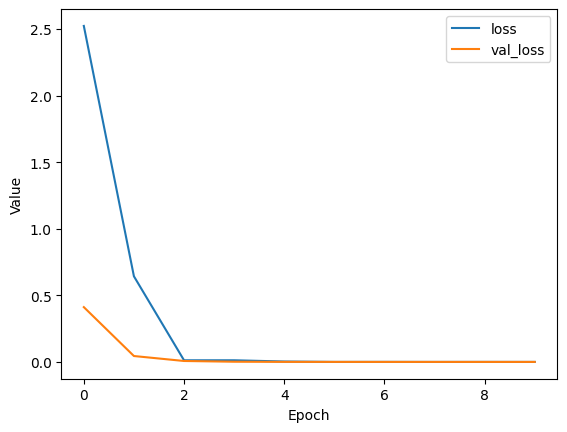

In [40]:

# Visualize Training
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

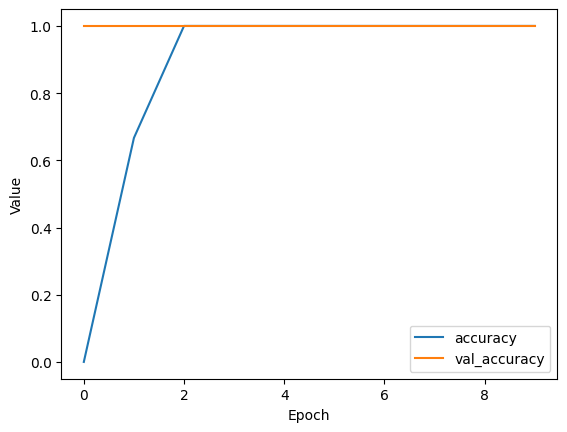

In [41]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [43]:
# Save Model
model.save("model2.h5")

In [44]:
# Load Model
loaded_model = tf.keras.models.load_model("model2.h5")

In [45]:
# Predict on New Image
def getPredictionsOnImage(img_path):
    # print(cv2.imread(img_path))
    # return
    testImg = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    preprocessedImg = preprocess_images(testImg)
    predictedImg = loaded_model.predict(np.expand_dims(preprocessedImg, axis=0))
    predicted_class = np.argmax(predictedImg, axis=1)[0]
    print(labelConfig['labels_reversed'][str(predicted_class)])

getPredictionsOnImage("test-mg.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
D


In [46]:
int("allImages_chunk_3.npz".split('_')[-1].split('.')[0])

3

In [47]:
list(range(1,int("allImages_chunk_3.npz".split('_')[-1].split('.')[0])+1))

[1, 2, 3]

In [48]:
arr = [1, 2, 3, 4, 5]

In [49]:
arr

[1, 2, 3, 4, 5]

In [50]:

arr.reverse()

In [51]:
arr

[5, 4, 3, 2, 1]